In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob

img = cv2.imread('mnist_knn.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cells = [np.hsplit(row, 100) for row in np.vsplit(gray, 50)]
x = np.array(cells)
print(x.shape)

train = x[:, :].reshape(-1, 400).astype(np.float32)
print(train.shape)

k = np.arange(10)
train_labels = np.repeat(k, 500)[:, np.newaxis]
print(train_labels.shape)

np.savez("train_sample.npz", train=train, train_labels=train_labels)
c = np.load("train_sample.npz")
print(c['train'][0])

(50, 100, 20, 20)
(5000, 400)
(5000, 1)
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.  33.   9.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  41. 177. 249. 178.  29.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.  33. 198. 255. 240. 255. 107.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  70. 199. 255. 255.
 197. 154. 253.  98.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  45. 238. 255. 205. 224. 222.  83. 224. 128.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.  25. 202. 255. 193.  40.  99.  54.   0.
 190. 197.  16.   0.   0.   0.   0.   0.   0.   0.   0.  20. 163. 246.
 152.  72.   0.   0.   0.   0. 184. 252.  74.   0.   0.   0.   0.   0.
   0.   0.   0.  97. 255. 118.   0.  

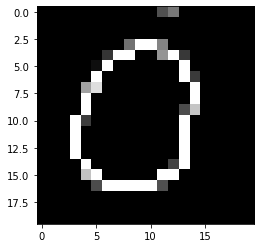

[[0.]]


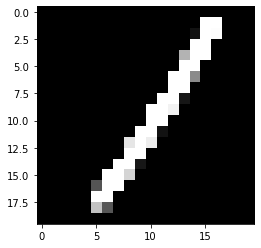

[[1.]]


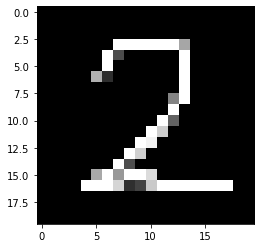

[[2.]]


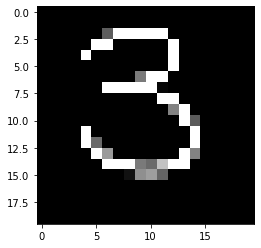

[[3.]]


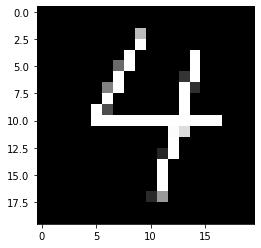

[[4.]]


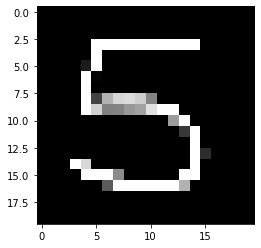

[[5.]]


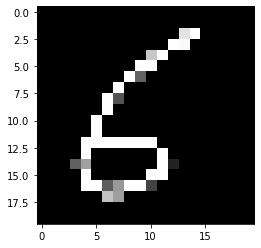

[[5.]]


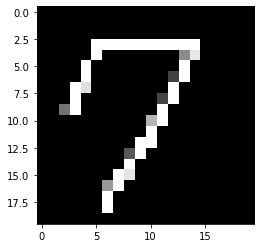

[[1.]]


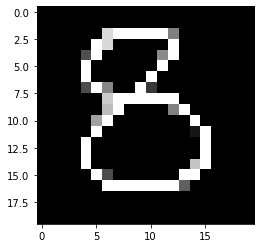

[[5.]]


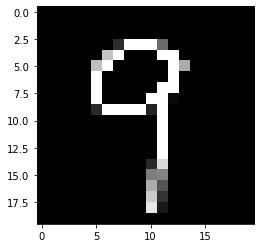

[[4.]]


In [55]:
import cv2
import numpy as np


FILE_NAME = 'train_sample.npz'

def load_train_data(file_name):
  with np.load(file_name) as data:
    train = data['train']
    train_labels = data['train_labels']
  return train, train_labels

def flatten_process(image):
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gray_resize = cv2.resize(gray, (20, 20))
  plt.imshow(cv2.cvtColor(gray_resize, cv2.COLOR_GRAY2RGB))
  plt.show()
  return gray_resize.reshape(-1, 400).astype(np.float32)

def check(test, train, train_labels):
  knn = cv2.ml.KNearest_create()
  knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)
  ret, result, neighbours, dist = knn.findNearest(test, k=5)
  return result

train, train_labels = load_train_data(FILE_NAME)

for file_name in glob.glob('./test_*.png'):
  test = flatten_process(file_name)
  result = check(test, train, train_labels)
  print(result)
